#**Titanic:Machine Learning from Disaster**
**Problem:** To predict which passengers survived the Titanic shipwreck. 

1.  survival:	Whether the person survived or not (0 = No, 1 = Yes).
2.  pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
3.  sex:	Gender of the person	
4.  Age:	Age in years	
5.  sibsp: Number of siblings / spouses aboard the Titanic	
6.  parch: Number of parents / children aboard the Titanic	
7.  ticket:	Ticket number	
8.  fare:	Passenger fare	
9.  cabin:	Cabin number	
10. embarked:	Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton).



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
dftrain=pd.read_csv("train.csv")
dftest=pd.read_csv("test.csv")

#Visualization
We would like to visualize our data so we can manipulate it and get the best results.

In [ ]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dftrain.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

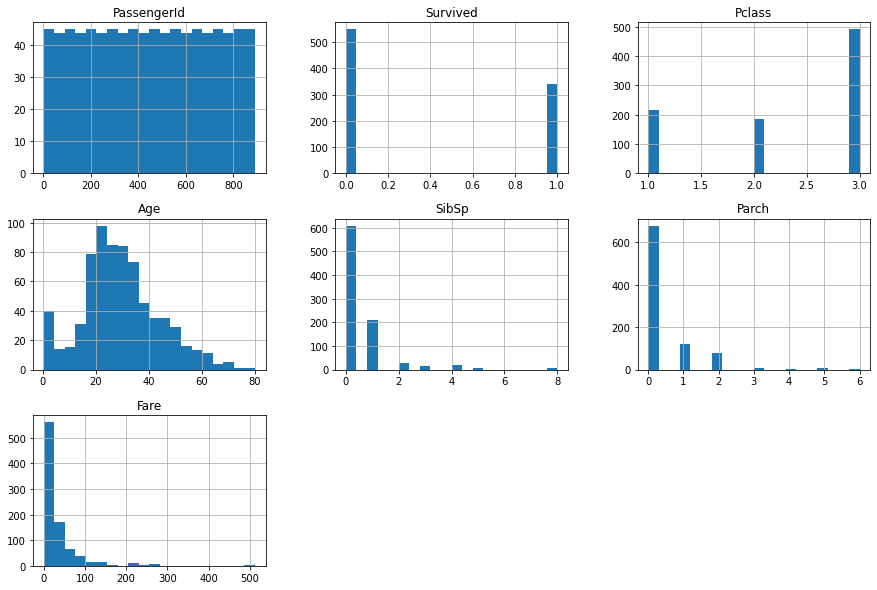

In [ ]:
dftrain.hist(bins=20,figsize=(15,10));

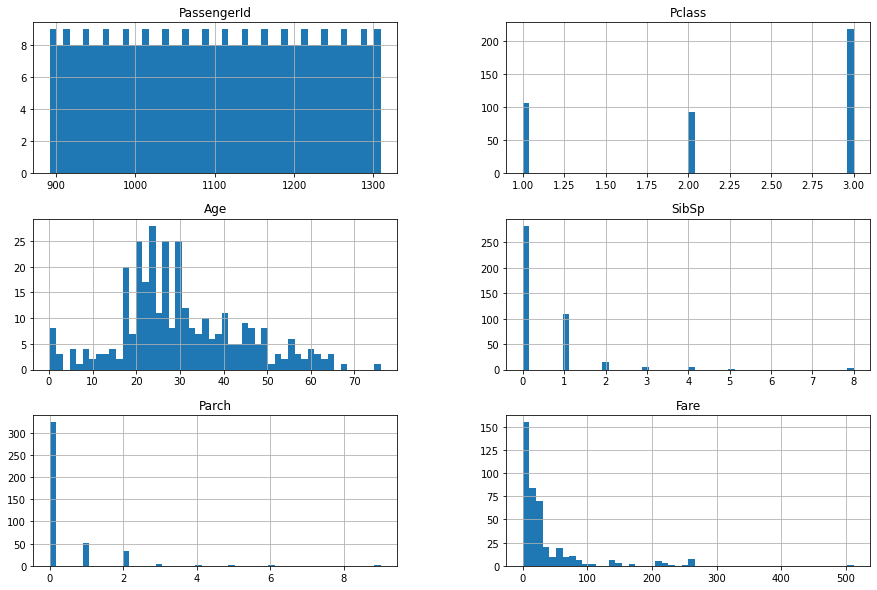

In [ ]:
dftest.hist(bins=50,figsize=(15,10));

#Splitting of data

In [ ]:
x=dftrain.drop("Survived",axis=1)
y=dftrain["Survived"]

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((712, 11), (712,), (179, 11), (179,))

#Name Feature

In [ ]:
dataset=[x_train,x_val,dftest]
for df in dataset:
  df["Title"]=df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)

In [ ]:
x_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
764,765,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S,Mr
727,728,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q,Miss
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S,Mr
506,507,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S,Mrs
482,483,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S,Mr


In [ ]:
title = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
for df in dataset:
    df['Title'] = df['Title'].map(title)

In [ ]:
x_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
725,726,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S,0
114,115,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C,1
292,293,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C,0
757,758,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S,0
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,2


In [ ]:
x_train.drop('Name', axis=1, inplace=True)
x_val.drop('Name',axis=1,inplace=True)
dftest.drop('Name', axis=1, inplace=True)

#Sex Feature

In [ ]:
sex = {"male": 0, "female": 1}
for df in dataset:
    df['Sex'] = df['Sex'].map(sex)

#Age Feature

In [ ]:
x_train.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            149
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          552
Embarked         1
Title            0
dtype: int64

In [ ]:
for df in dataset:
  df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)

#Embarked Feature

In [ ]:
x_train["Embarked"].value_counts()

S    502
C    146
Q     63
Name: Embarked, dtype: int64

In [ ]:
x_train["Embarked"].fillna("S",inplace=True)
x_val["Embarked"].fillna("S", inplace=True)

In [ ]:
embark = {"S": 0, "C": 1, "Q":2}
for df in dataset:
    df['Embarked'] = df['Embarked'].map(embark)

#Fare Feature

In [ ]:
x_train["Fare"].value_counts()

8.0500     34
7.8958     33
13.0000    33
26.0000    28
10.5000    22
           ..
13.8625     1
10.1708     1
36.7500     1
93.5000     1
51.4792     1
Name: Fare, Length: 223, dtype: int64

In [ ]:
x_val["Fare"].value_counts()

8.050     11
13.000    10
26.000     7
7.750      7
7.925      7
          ..
49.500     1
52.000     1
6.750      1
30.000     1
57.000     1
Name: Fare, Length: 89, dtype: int64

In [ ]:
dftest["Fare"].fillna(7.5,inplace=True)

#Cabin Feature

In [ ]:
x_train["Cabin"].value_counts()

G6         4
B96 B98    4
F2         3
E101       3
C22 C26    3
          ..
C70        1
B19        1
F E69      1
B102       1
B42        1
Name: Cabin, Length: 123, dtype: int64

In [ ]:
for df in dataset:
    df['Cabin'] = df['Cabin'].str[:1]

In [ ]:
cabin = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7}
for df in dataset:
    df['Cabin'] = df['Cabin'].map(cabin)

In [ ]:
x_train["Cabin"].fillna(x_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
x_val["Cabin"].fillna(x_val.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
dftest["Cabin"].fillna(dftest.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [ ]:
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
142,143,3,1,24.0,1,0,STON/O2. 3101279,15.8500,5.0,0,2
505,506,1,0,18.0,1,0,PC 17758,108.9000,2.0,1,0
314,315,2,0,43.0,1,1,F.C.C. 13529,26.2500,5.0,0,0
29,30,3,0,30.0,0,0,349216,7.8958,5.0,0,0
873,874,3,0,47.0,0,0,345765,9.0000,5.0,0,0


#Ticket Feature

In [ ]:
x_train=x_train.drop("Ticket",axis=1)
x_val=x_val.drop("Ticket",axis=1)
dftest=dftest.drop("Ticket",axis=1)

#Creating a func for data processing

In [4]:
def dataprocess(dftrain,dftest):
  x=dftrain.drop("Survived",axis=1)
  y=dftrain["Survived"]
  x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)

  dataset=[x_train,x_val,dftest]

  title = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
  sex = {"male": 0, "female": 1}
  cabin = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7}

  for df in dataset:
    df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
    df['Title'] = df['Title'].map(title)
    df['Sex'] = df['Sex'].map(sex)
    df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)
    df['Cabin'] = df['Cabin'].str[:1]
    df['Cabin'] = df['Cabin'].map(cabin) 

  x_train.drop('Name', axis=1, inplace=True)
  x_val.drop('Name',axis=1,inplace=True)
  dftest.drop('Name', axis=1, inplace=True)
  x_train["Embarked"].fillna("S",inplace=True)
  x_val["Embarked"].fillna("S", inplace=True)
  dftest["Fare"].fillna(7.5,inplace=True)    

  x_train["Cabin"].fillna(x_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
  x_val["Cabin"].fillna(x_val.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
  dftest["Cabin"].fillna(dftest.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

  x_train=x_train.drop("Ticket",axis=1)
  x_val=x_val.drop("Ticket",axis=1)
  dftest=dftest.drop("Ticket",axis=1)

  embark={"S":0,"C":1,"Q":2}
  x_train["Embarked"]=x_train["Embarked"].map(embark)
  x_val["Embarked"]=x_val["Embarked"].map(embark)
  dftest["Embarked"]=dftest["Embarked"].map(embark)
  return x_train,y_train,x_val,y_val,dftest

In [5]:
dftrain=pd.read_csv("train.csv")
dftest=pd.read_csv("test.csv")

In [ ]:
x_train,y_train,x_val,y_val,dftest=dataprocess(dftrain,dftest)

In [ ]:
x_train.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
810,811,3,0,26.0,0,0,7.8875,5.0,0,0
694,695,1,0,60.0,0,0,26.5500,2.0,0,4


#Research

###Selecting models

In [ ]:
model={"logistic": LogisticRegression(),
       "knn": KNeighborsClassifier(),
       "random":RandomForestClassifier(),
       "linear":LinearSVC()}


def fitscore(model,x_train,y_train,x_test,y_test):
  np.random.seed(42)
  for name,models in model.items():
    models.fit(x_train,y_train)
    print(f"{name} {models.score(x_test,y_test)}")

In [ ]:
np.random.seed(42)
fitscore(model,x_train,y_train,x_val,y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


logistic 0.8212290502793296
knn 0.6871508379888268
random 0.8491620111731844
linear 0.6983240223463687


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#choosing logistic and random
lg=LogisticRegression()
rf=RandomForestClassifier()

###logistic

In [ ]:
#Starting hyperparameter tuning with logistic
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
log_reg_grid={"C":np.logspace(-4,4,10),
              "class_weight":["dict","balanced"],
              "penalty":["l1","l2","elasticnet","none"]
              }


np.random.seed(42)
rs_log_reg=GridSearchCV(estimator=lg,
                              param_grid=log_reg_grid,
                              cv=10,
                              
                              verbose=2)

In [ ]:
rs_log_reg.fit(x_train,y_train)

In [ ]:
rs_log_reg.best_score_

0.8145735524256651

In [ ]:
rs_log_reg.best_params_

{'C': 0.046415888336127774, 'class_weight': 'dict', 'penalty': 'l2'}

###Randomforest

In [ ]:
#starting hyperparameter tuning with random forest
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_grid={"n_estimators":np.arange(10,1000,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,5),
         "min_samples_leaf":np.arange(1,20,5),
         "max_features":["auto","sqrt","log2"],
         "class_weight":["balanced","balanced_subsample"]}

In [ ]:
np.random.seed(42)
re_log_reg=RandomizedSearchCV(estimator=rf,
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=500,
                              verbose=2)

In [ ]:
re_log_reg.fit(x_train,y_train)

In [ ]:
re_log_reg.best_score_

0.8356347877474638

In [ ]:
re_log_reg.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
re_log_reg.score(x_val,y_val)

0.8324022346368715

#Choosing Randomforest for the data

In [ ]:
dftest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,5.0,2,0
1,893,3,1,47.0,1,0,7.0000,5.0,0,2
2,894,2,0,62.0,0,0,9.6875,5.0,2,0
3,895,3,0,27.0,0,0,8.6625,5.0,0,0
4,896,3,1,22.0,1,1,12.2875,5.0,0,2


In [7]:
rf=RandomForestClassifier(n_estimators=150,class_weight="balanced_subsample",max_depth=None,max_features="auto",min_samples_leaf=1,min_samples_split=2)

In [8]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [9]:
prediction=rf.predict(dftest)
result=pd.DataFrame({"PassengerId":dftest["PassengerId"],
                    "Survived":prediction})

In [10]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
